In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance
from itertools import combinations
np.random.seed(52)

In [7]:
a = np.random.randint(1, 5, size=(5,3))
b = np.random.randint(6, 10, size=(5,3))
dataset = np.vstack((a, b))
dataset

array([[2, 3, 1],
       [4, 3, 3],
       [2, 1, 2],
       [1, 1, 4],
       [3, 1, 3],
       [9, 6, 6],
       [8, 9, 8],
       [6, 7, 9],
       [9, 6, 7],
       [6, 6, 6]])

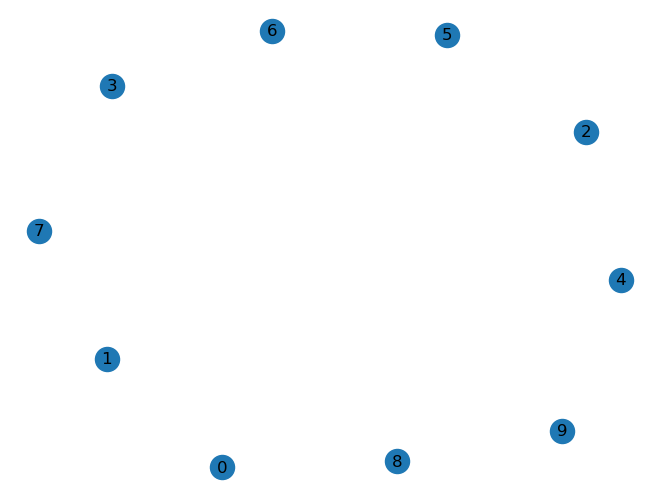

In [75]:
# create an empty graph
g = nx.DiGraph()

for i, row in enumerate(dataset):
    g.add_node(i, data = row)

nx.draw(g, with_labels=True)

In [32]:
# calculating euclidean distances
similarity_distance = distance.pdist(dataset, 'euclidean')
med = np.median(similarity_distance)

gauss_kernel_simi = np.exp(-np.square(similarity_distance)/(2*np.square(med)))

In [79]:
#creating adjacency matrices
adj_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
indices = list(combinations(range(dataset.shape[0]), 2))
assert len(list(indices)) == len(gauss_kernel_simi)

for i in range(len(gauss_kernel_simi)):
    adj_matrix[indices[i][0], indices[i][1]] = gauss_kernel_simi[i]
    adj_matrix[indices[i][1], indices[i][0]] = gauss_kernel_simi[i]
    indices[i] = indices[i] + (float(gauss_kernel_simi[i]), )

adj_matrix



array([[0.        , 0.91117231, 0.94351828, 0.84976903, 0.90063864,
        0.3809389 , 0.24488251, 0.32749612, 0.33520156, 0.55911766],
       [0.91117231, 0.        , 0.90063864, 0.84976903, 0.94351828,
        0.60653066, 0.40846509, 0.5214391 , 0.55911766, 0.77428601],
       [0.94351828, 0.90063864, 0.        , 0.94351828, 0.97701252,
        0.35116059, 0.20568789, 0.30899858, 0.3162688 , 0.51541097],
       [0.84976903, 0.84976903, 0.94351828, 0.        , 0.94351828,
        0.339122  , 0.22313016, 0.36787944, 0.31996781, 0.5337077 ],
       [0.90063864, 0.94351828, 0.97701252, 0.94351828, 0.        ,
        0.4431028 , 0.26564847, 0.38990176, 0.40846509, 0.60653066],
       [0.3809389 , 0.60653066, 0.35116059, 0.339122  , 0.4431028 ,
        0.        , 0.84976903, 0.80177262, 0.98843944, 0.90063864],
       [0.24488251, 0.40846509, 0.20568789, 0.22313016, 0.26564847,
        0.84976903, 0.        , 0.90063864, 0.87993523, 0.82063699],
       [0.32749612, 0.5214391 , 0.3089985

In [44]:
#Create a degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
degree_matrix

array([[5.45273502, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 6.47493678, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 5.46221457, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 5.37038173, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 5.8783365 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        5.66147468, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 4.79879401, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [45]:
#create a laplacian matrix L = Degree - Adjacency

lap_mat = degree_matrix - adj_matrix
lap_mat

array([[ 5.45273502, -0.91117231, -0.94351828, -0.84976903, -0.90063864,
        -0.3809389 , -0.24488251, -0.32749612, -0.33520156, -0.55911766],
       [-0.91117231,  6.47493678, -0.90063864, -0.84976903, -0.94351828,
        -0.60653066, -0.40846509, -0.5214391 , -0.55911766, -0.77428601],
       [-0.94351828, -0.90063864,  5.46221457, -0.94351828, -0.97701252,
        -0.35116059, -0.20568789, -0.30899858, -0.3162688 , -0.51541097],
       [-0.84976903, -0.84976903, -0.94351828,  5.37038173, -0.94351828,
        -0.339122  , -0.22313016, -0.36787944, -0.31996781, -0.5337077 ],
       [-0.90063864, -0.94351828, -0.97701252, -0.94351828,  5.8783365 ,
        -0.4431028 , -0.26564847, -0.38990176, -0.40846509, -0.60653066],
       [-0.3809389 , -0.60653066, -0.35116059, -0.339122  , -0.4431028 ,
         5.66147468, -0.84976903, -0.80177262, -0.98843944, -0.90063864],
       [-0.24488251, -0.40846509, -0.20568789, -0.22313016, -0.26564847,
        -0.84976903,  4.79879401, -0.90063864

In [67]:
eig_val, eig_vec = np.linalg.eigh(lap_mat)
eig_val, eig_vec = np.argsort(eig_val), eig_vec[np.argsort(eig_val)]

In [70]:
fiedler_vector = eig_vec[:, 1]
fiedler_vector

array([-0.33548559, -0.15603009, -0.37168069, -0.3549967 , -0.27959753,
        0.26218998,  0.49872903,  0.31029679,  0.30278237,  0.12379242])

{0: Text(-0.288622188909382, -0.2199280038022276, '0'),
 1: Text(-0.21349561968315173, -0.43418827996089254, '1'),
 2: Text(-0.05670198992361362, 0.3258973779221226, '2'),
 3: Text(0.3667694490593336, -0.2533699854044091, '3'),
 4: Text(-0.5901094988466697, 0.016531617212742586, '4'),
 5: Text(0.05299980330598429, -0.20145114071857526, '5'),
 6: Text(-0.24726168518787078, 0.13278011784546287, '6'),
 7: Text(0.2642005827261323, 0.27886248286853793, '7'),
 8: Text(-0.2877788525407637, 0.6506721868572201, '8'),
 9: Text(1.0, -0.29580637281998157, '9')}

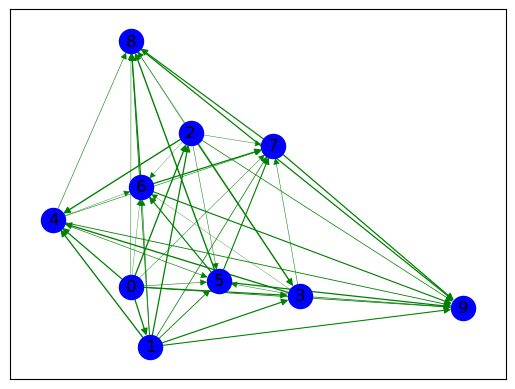

In [97]:
weights = [g[u][v]['weight'] for u,v in g.edges()]
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color="blue")
nx.draw_networkx_edges(g, pos, width=weights, edge_color="green")
nx.draw_networkx_labels(g, pos, font_color="black")

In [100]:
fiedler_vector_med = np.median(fiedler_vector)
clusters = np.where(fiedler_vector > fiedler_vector_med, 1, 0)

In [102]:
colors = ["red" if cluster == 0 else "blue" for cluster in clusters]
colors

['red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue']

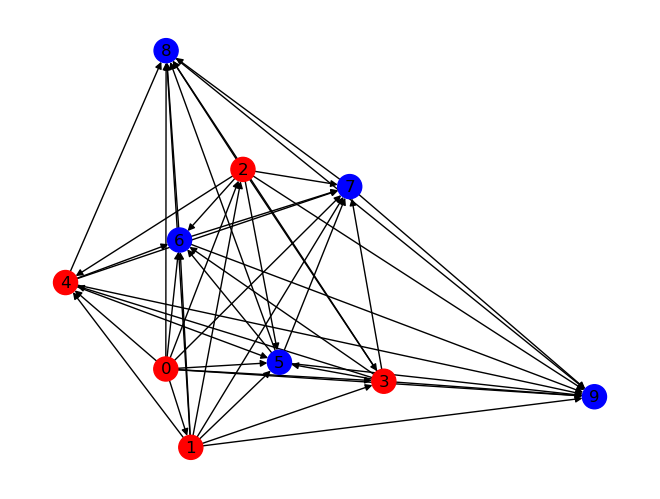

In [105]:
nx.draw(g, pos, node_color=colors, with_labels=True)